# PME3380 - Modelagem de Sistemas Dinâmicos

## Resposta em Frequência

Dadas as funções de transferência obtidas, o objetivo é estudar a resposta em frequência do sistema e obter os diagramas de bode.

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

### Funções de Transferência

In [2]:
G_1 = control.tf([ 0.00000000e+00,  0.00000000e+00, -1.50000000e+01, -3.75000000e-02,
   7.65000000e-02,  1.91250000e-04,  0.00000000e+00,  0.00000000e+00,
   0.00000000e+00,  0.00000000e+00,  0.00000000e+00],[ 1.0000e+00,  2.5000e-03, -1.0200e-02, -2.5500e-05,  2.6010e-05,  6.5025e-08,
  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])

G_2 = control.tf( [ 0.00000000e+00, -1.50000000e+01, -3.75000000e-02,  7.65000000e-02,
   1.91250000e-04, -9.21015981e-20,  0.00000000e+00,  0.00000000e+00,
   0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [ 1.0000e+00,  2.5000e-03, -1.0200e-02, -2.5500e-05,  2.6010e-05,  6.5025e-08,
  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00])
print(G_1)
print(G_2)


              -15 s^8 - 0.0375 s^7 + 0.0765 s^6 + 0.0001912 s^5
-----------------------------------------------------------------------------
s^10 + 0.0025 s^9 - 0.0102 s^8 - 2.55e-05 s^7 + 2.601e-05 s^6 + 6.503e-08 s^5


      -15 s^9 - 0.0375 s^8 + 0.0765 s^7 + 0.0001912 s^6 - 9.21e-20 s^5
-----------------------------------------------------------------------------
s^10 + 0.0025 s^9 - 0.0102 s^8 - 2.55e-05 s^7 + 2.601e-05 s^6 + 6.503e-08 s^5



(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*G
print(Gp)

### Diagrama de Bode

In [3]:
(num,den) = control.pade(0.25,3)
Gp_1 = control.tf(num,den)*G_1

(num,den) = control.pade(0.25,3)
Gp_2 = control.tf(num,den)*G_2

print(Gp_1)
print(Gp_2)


          15 s^11 - 720 s^10 + 1.44e+04 s^9 - 1.152e+05 s^8 - 361.4 s^7 + 587.3 s^6 + 1.469 s^5
---------------------------------------------------------------------------------------------------------
s^13 + 48 s^12 + 960.1 s^11 + 7682 s^10 + 9.407 s^9 - 78.36 s^8 - 0.1709 s^7 + 0.1998 s^6 + 0.0004994 s^5


 15 s^12 - 720 s^11 + 1.44e+04 s^10 - 1.152e+05 s^9 - 361.4 s^8 + 587.3 s^7 + 1.469 s^6 - 7.073e-16 s^5
---------------------------------------------------------------------------------------------------------
s^13 + 48 s^12 + 960.1 s^11 + 7682 s^10 + 9.407 s^9 - 78.36 s^8 - 0.1709 s^7 + 0.1998 s^6 + 0.0004994 s^5



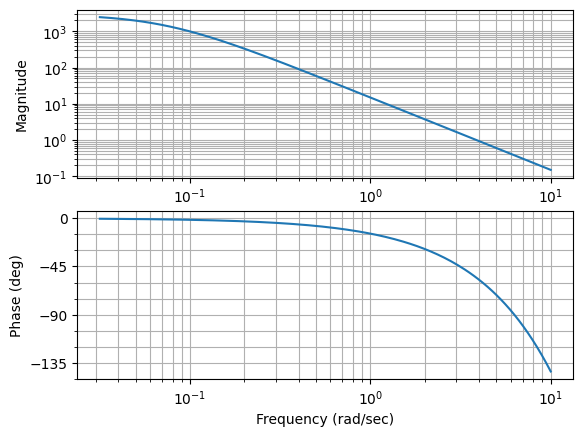

In [4]:
w = np.logspace(-1.5,1,200)
mag,phase,omega = control.bode(Gp_1,w)

Análise de Ganho de Fase e Frequência de Corte

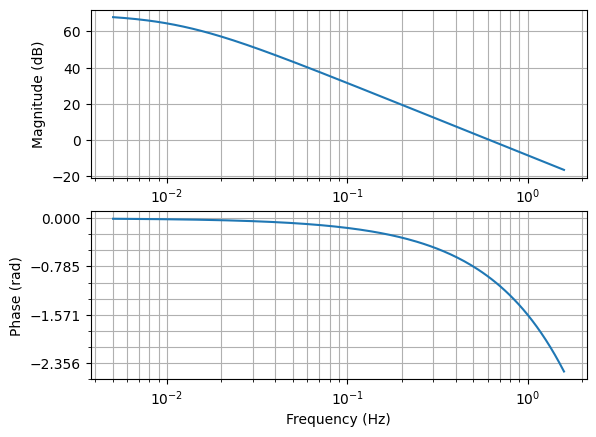

In [5]:
mag,phase,omega = control.bode(Gp_1,w,Hz=True,dB=True,deg=False)

Crossover freq =  10000.0  rad/sec
Gain at crossover =  1.4999999999234994e-07


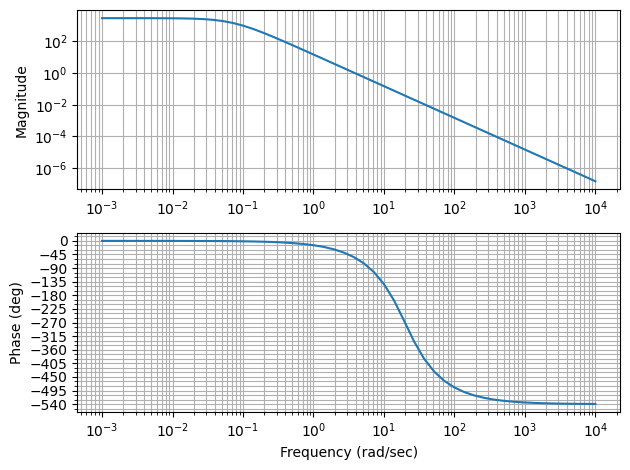

In [6]:
w = np.logspace(-3,4)
mag,phase,omega = control.bode(Gp_1,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

In [10]:
# Supondo que você já tenha definido Gp_1 e Kcu antes

# Obtenha o diagrama de Bode
mag, phase, omega = control.bode(Gp_1, Plot=False)

# Encontre a frequência de corte (crossover)
Kcu = 0  # Substitua pelo valor correto da ganho de crossover
wc = omega[mag.argmin()]  # Frequência onde a magnitude é mínima

# Encontre a frequência de ressonância
wr_index = mag.argmax()  # Índice onde a magnitude é máxima
wr = omega[wr_index]

# Encontre a frequência de rejeição
wrej_index = mag.argmin()  # Índice onde a magnitude é mínima (após a ressonância)
wrej = omega[wrej_index]

# Imprima os resultados
print("Frequência de Corte (Crossover): {:.3g} rad/sec".format(wc))
print("Frequência de Ressonância: {:.3g} rad/sec".format(wr))
print("Frequência de Rejeição: {:.3g} rad/sec".format(wrej))

# Adicione essas linhas ao seu código se desejar
plt.show()


Frequência de Corte (Crossover): 100 rad/sec
Frequência de Ressonância: 0.0001 rad/sec
Frequência de Rejeição: 100 rad/sec
